# Geant4 Gammas
Paper plots for the Instrument discovering it's hardware threshold

In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load the data
geant = pd.read_csv('./Data/GEANT4-OUTPUT/gammas.csv').to_numpy().T

In [3]:
# Manage the data
input_energy    = geant[2]
crystal_energy  = np.sum(geant[3:7],axis=0)

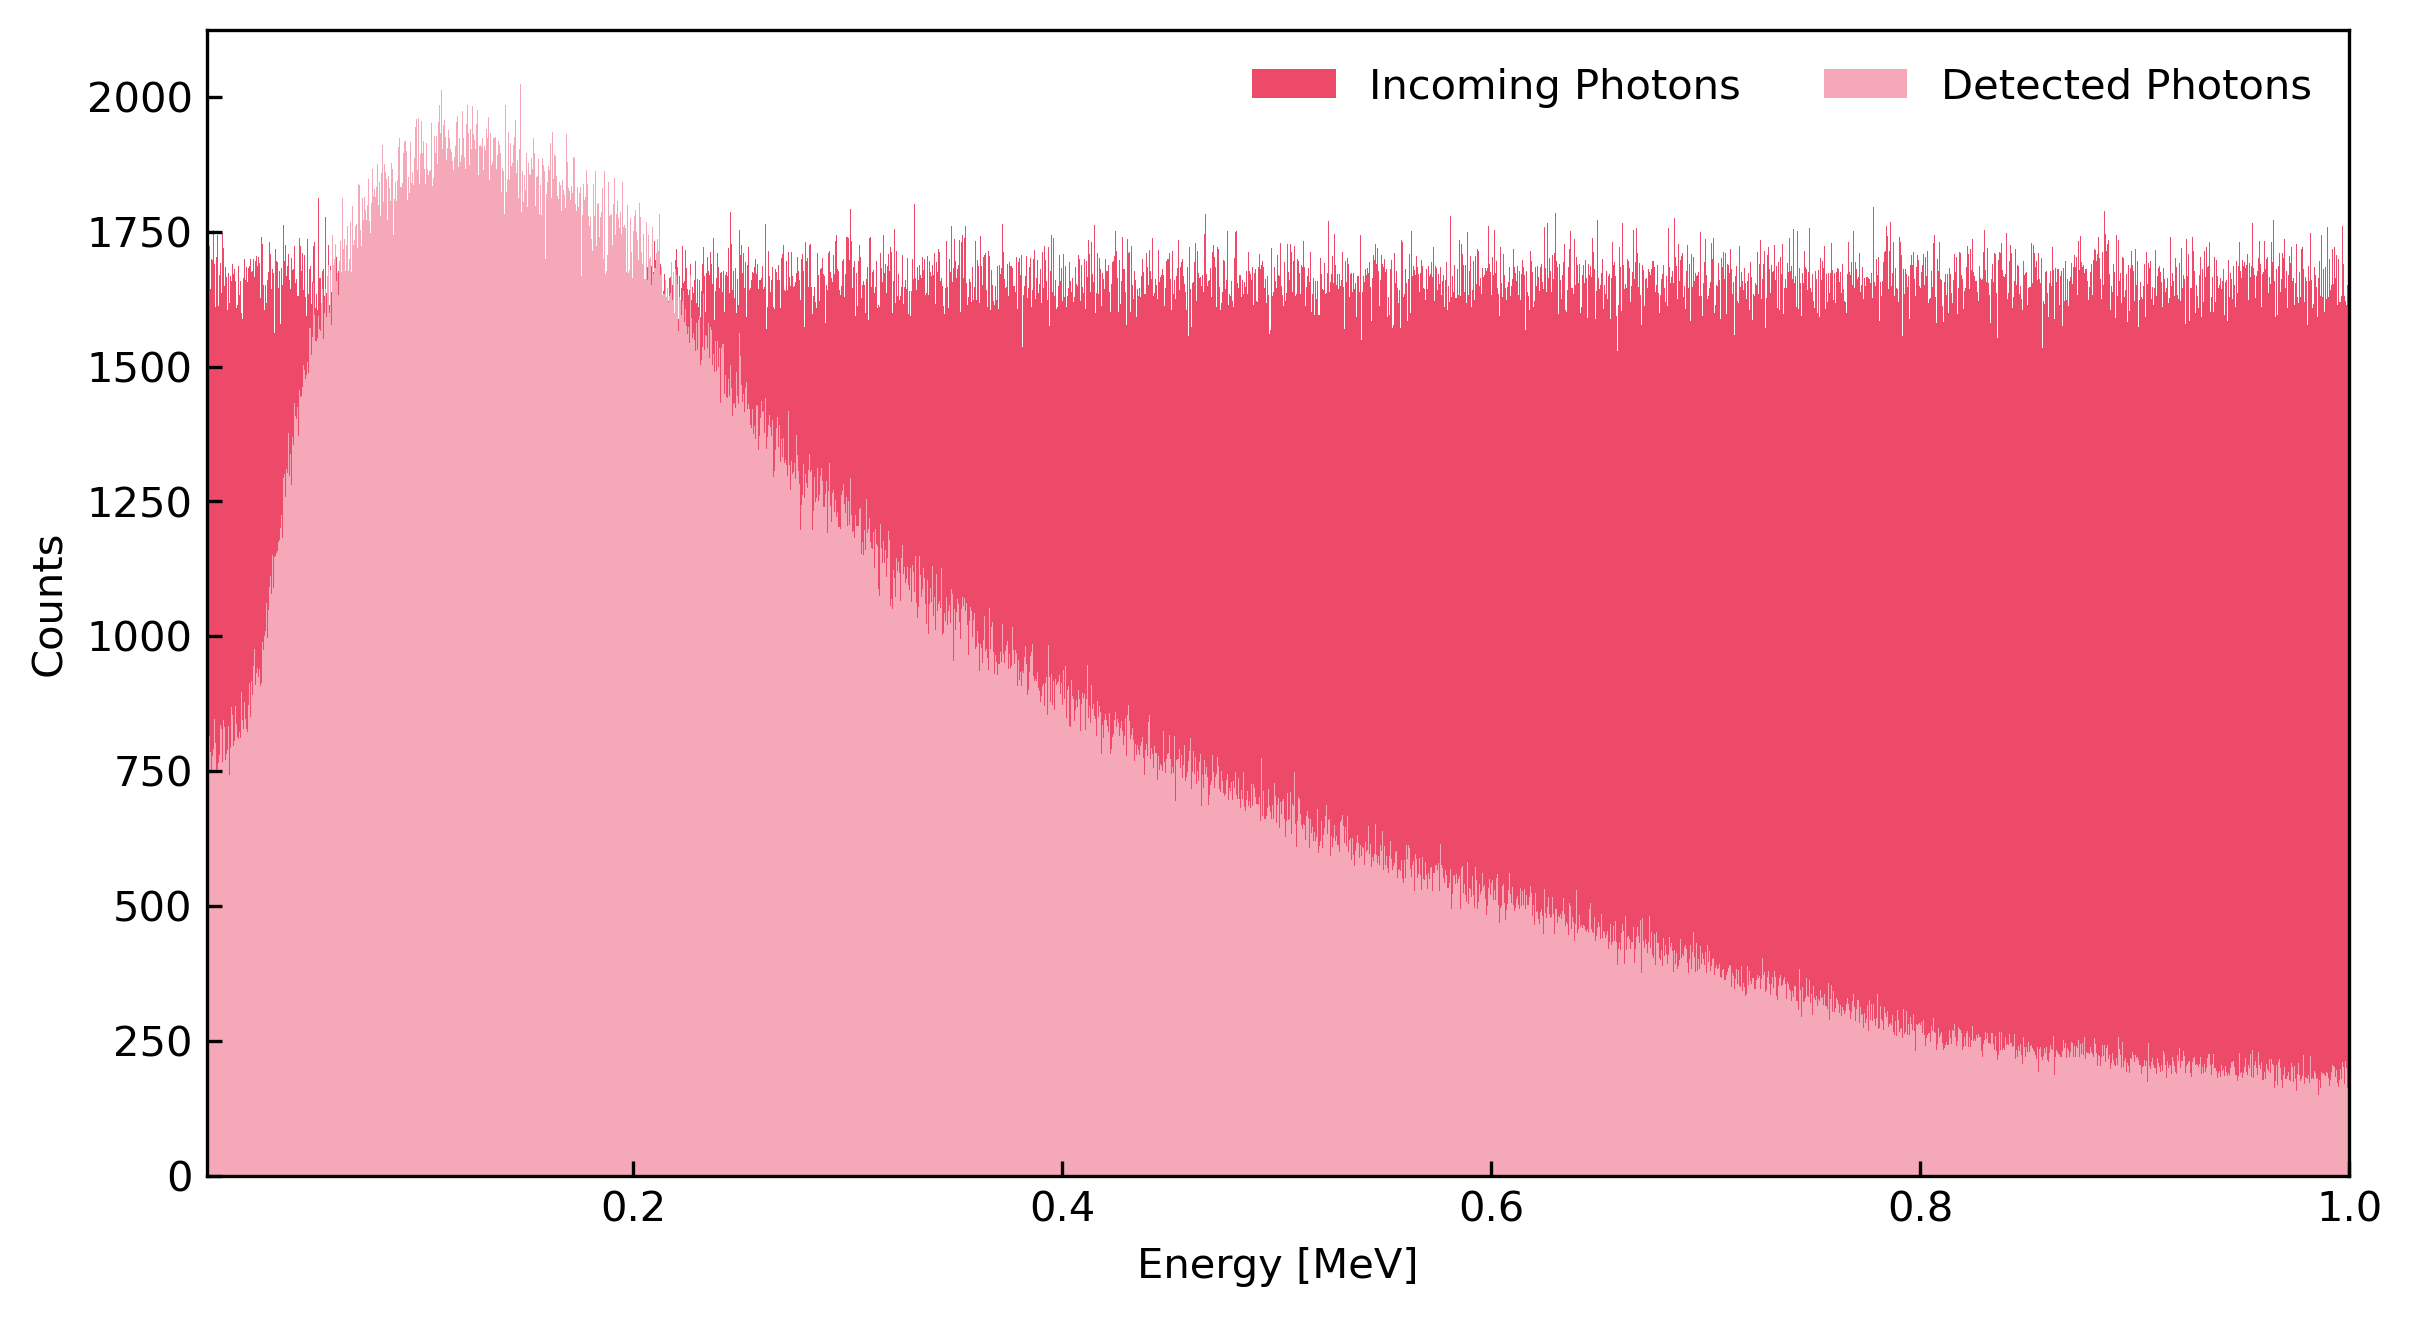

In [22]:
# Create the stacked histogram

# Build the figure
CMTOIN = 0.393701*1.8
fig    = plt.figure(figsize=(13*CMTOIN,7*CMTOIN),dpi=300)
fig.tight_layout(pad=3)
ax     = fig.add_subplot(111)

# Set the colors of the histogram
colors_i    = ['#ED4A6A','#1F97C6']
colors_o    = ['#f5a9b8','#5bcefa']
bins     =  np.linspace(input_energy.min(),input_energy.max(),3000)

# Plot the input energy histogram
ax.hist(input_energy,bins=bins,color=colors_i[0],label='Incoming Photons');
ax.hist(crystal_energy,bins=bins,color=colors_o[0],label='Detected Photons');
# ax.hist(crystal_energy.T,bins=bins,stacked=True,color=colors_o,alpha=0.8,label=['Detected Electrons','Detected Protons']);

# Prettify
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(bins[1],bins[-1])
ax.legend(frameon=False,loc='upper right',ncol=2)
ax.tick_params(axis = 'both', which = 'both', direction='in')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Counts');

In [23]:
# fig.savefig("geant4-spectra.png", format="png", bbox_inches="tight")

Text(0, 0.5, 'Deposited/Incoming Energy on Crystals')

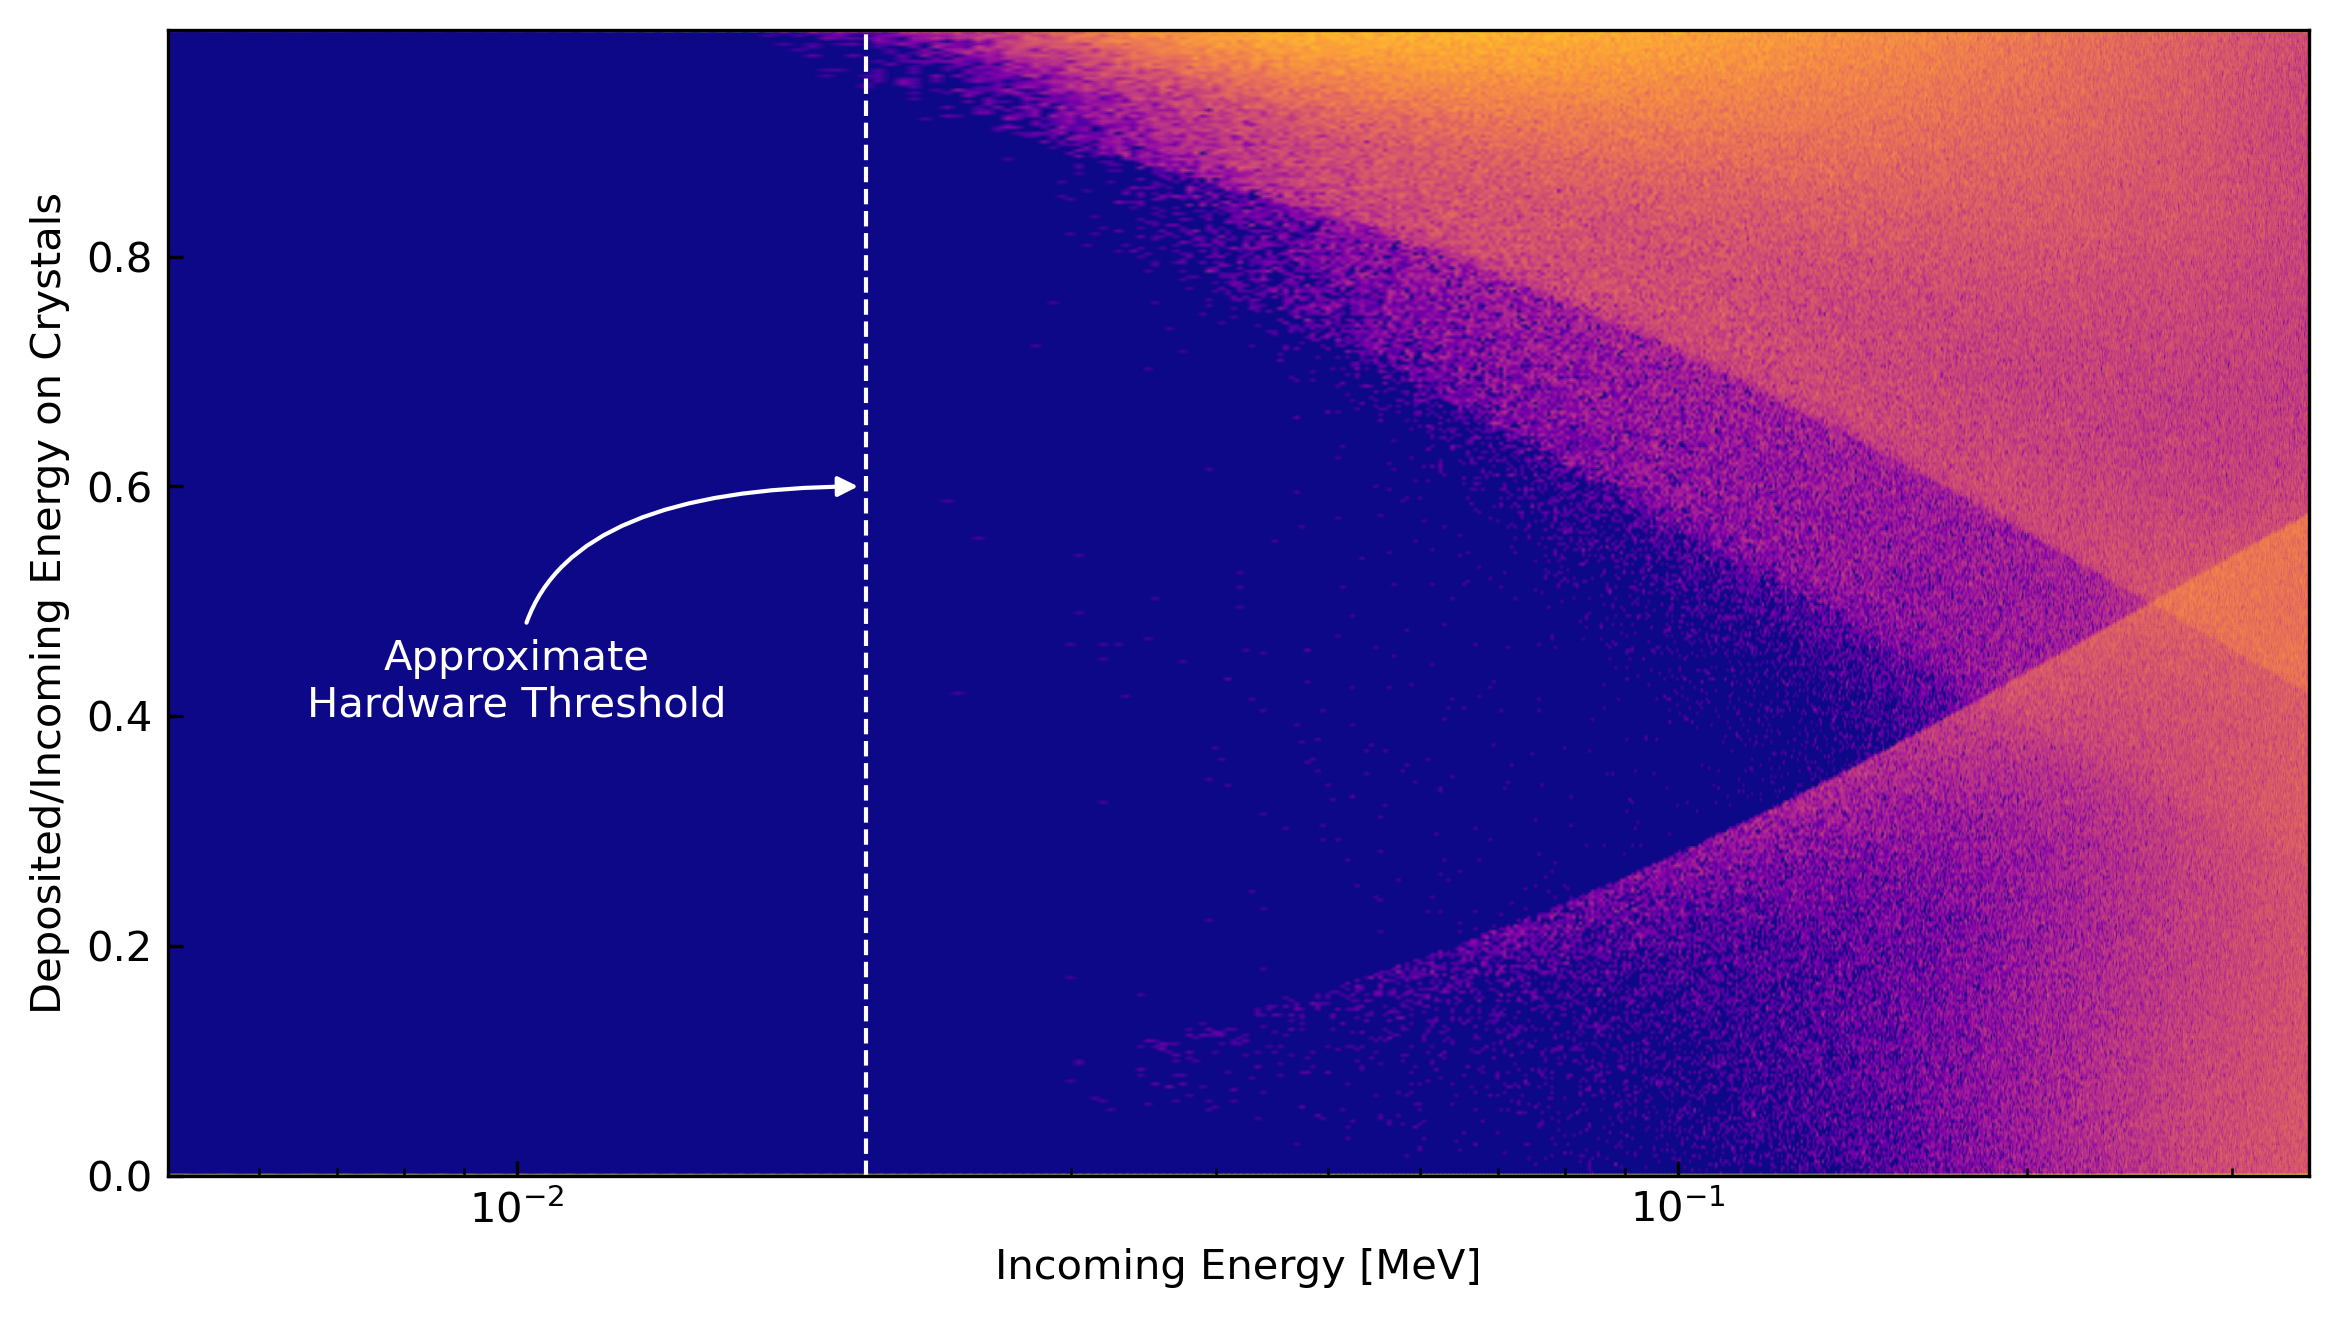

In [28]:
# Build the figure
CMTOIN = 0.393701*1.8
fig    = plt.figure(figsize=(13*CMTOIN,7*CMTOIN),dpi=300)
fig.tight_layout(pad=3)
ax1    = fig.add_subplot(111)

# Set the labels
labels      = ['Photons','Protons']
colors_i    = ['grey','#E8891D','#ED4A6A','#1F97C6']


## Plot the scatter
# ax1.scatter(input_energy,crystal_energy/input_energy,s=1e-1,marker=',',c=colors_i[0],alpha=0.5,label=labels[0])
TAIL = 1

from copy import copy
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(input_energy[:-TAIL],crystal_energy[:-TAIL]/input_energy[:-TAIL], bins=[2000, 400])
pcm = ax1.pcolormesh(xedges[:-1], yedges[:-1], h.T, cmap=cmap,norm=mpl.colors.LogNorm(vmax=1.5e2), rasterized=True, shading='gouraud')
# pcm = ax1.imshow(h.T, cmap=cmap, norm=mpl.colors.LogNorm(vmax=1.5e2), rasterized=True, interpolation='bicubic')
# ax1.hist2d(input_energy[:-TAIL],crystal_energy[:-TAIL]/input_energy[:-TAIL],bins=1000,norm=mpl.colors.LogNorm())

## Plot a vertical line
ax1.axvline(2e-2,ls='--',lw=1,c='w')
ax1.annotate('Approximate\nHardware Threshold',xy=(2e-2,6e-1),xycoords='data',horizontalalignment='center',
            xytext=(1e-2,4e-1),textcoords='data',fontsize=10,
            arrowprops=dict(arrowstyle='-|>',color='w',connectionstyle="angle3"),c='w')

## Prettify
ax1.set_xscale('log')
ax1.tick_params(axis = 'both', which = 'both', direction='in')
ax1.set_xlim(5e-3,3.5e-1)
# ax1.set_ylim(-.005,1.005)
ax1.set_xlabel('Incoming Energy [MeV]')
ax1.set_ylabel('Deposited/Incoming Energy on Crystals')


In [29]:
# fig.savefig("geant4-scatter.png", format="png", bbox_inches="tight")